# Gaming Stocks Analysis
---

## Author Information

Name : Darryn Johnson

Date last updated : 11/28/2024

---
## Sources and Links

Original Kaggle dataset : [Video Game Stocks: Financial Market Data](https://www.kaggle.com/datasets/datadrivenx/video-game-stocks-financial-market-data)

---
# Overview

---
# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('gaming_stocks.zip')

In [35]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,year,Open Value in USD,High Value in USD,Low Value in USD,Close Value in USD,Adj Close in USD
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,2000,0.191117,0.195431,0.139695,0.16951,0.097385
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,2000,0.169468,0.210883,0.1675,0.210045,0.120673
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,2000,0.20167,0.20971,0.14539,0.187684,0.107826
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,2000,0.189275,0.189275,0.149494,0.151169,0.086929
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,2000,0.15209,0.157324,0.118925,0.122191,0.070266


In [36]:
df['Company'].value_counts()

Company
Sony Interactive Entertainment       298
Microsoft Gaming                     298
Nintendo                             298
Electronic Arts                      298
Take-Two Interactive                 298
NetEase Games                        292
Tencent Interactive Entertainment    244
Embracer Group                        95
Playtika                              45
Roblox Corporation                    43
Name: count, dtype: int64

---
# Reproducability

To reproduce these results yourself, open google colab and locate this github repo under my github account. From there, simply run the notebook from start to finish.

In [5]:
# !kaggle datasets download -d datadrivenx/video-game-stocks-financial-market-data
# !unzip datadrivenx/video-game-stocks-financial-market-data

---
# Business Understanding 

The purpose of the following notebook is to look into patters in the stock market ragerding gaming tech companies. This is valuable to shareholders and investors as it gives insigt to the iner-workings of this specific field, and can inform a decision.

- Business Objectives
    - analize stock data to locate a trend
- Situation Assesement
    - resources available
        - stock opening/closing prices, trading volume, and other relevant financial indicators
    - resources unavailable
        - undisclosed internal information such as :
            - upcoming unanounced releases
            - internal stresses that may cause unpredictable outcomes
- Data Mining Goal
    - assess and understand the data provided
- Project plan
    - produce accurate and usable metrics to inform a decision regarding stock market investments

---
# Data Understanding 
Let's take a quick look into what the data we are working with actually is. In this case, we have metadata, which is just data about the data.  

## Column Metadata

- Company
    - The name of the video game company
- Ticker Symbol
    - The stock's unique symbol used for trading
- Currency
    - The currency used for the stock's price
        - USD - United States Dollar | 1 : 1 USD
            - Microsoft Gaming
            - Electronic Arts
            - Take Two interactive
            - NetEase Games
            - Roblox Corporation
            - Nintendo
            - Playtika
        - JPY - Japanese Yen | 1 JPY : 0.0067 USD
            - Sony Interactive Entertainment
        - HKD - Hong Kong Dollar | 1 HKD : 0.13 USD
            - Tencent Interactive Entertainment
        - SEK - Swedish Krona | 1 SEK : 0.092 USD
            - Embracer Group
- Open
    - The stock price at market open for the given day
- High
    - The highest stock price during the trading day
- Low
    - The lowest stock price during the trading day
- Close
    - The stock price at market close for the given day
- Adj Close
    - The adjusted closing price, accounting for dividends and stock splits
        - dividends
            - a payment to a shareholder with additional stocks rather then money
        - stock splits
            - spliting owned stocks into smaller subsets, while maintaining the overall value of the stocks 
- Volume
    - The total number of shares traded during the day

## Note From Original Dataset Creator

While _Epic Games_ and _MiHoYo_ are also major players in the video game industry, and would have ranked no. 7 and 10 respectively, they are privately held and do not have publicly traded stocks, so their financial data is not included in this dataset.

The dataset contains monthly data for the period from January 1, 2000, to October 31, 2024. The data was extracted using the Yahoo Finance library in Python, and includes key market metrics such as stock opening/closing prices, trading volume, and other relevant financial indicators.

---
# Data Distribution

---
# Data Preparation

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['year'] = df['Date'].dt.year

## Conversion Column Creation

In [8]:
df['Open Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Open Value in USD'] = row['Open'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Open Value in USD'] = row['Open']

In [9]:
df['High Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'High Value in USD'] = row['High'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'High Value in USD'] = row['High']

In [10]:
df['Low Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Low Value in USD'] = row['Low'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Low Value in USD'] = row['Low']

In [11]:
df['Close Value in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Close Value in USD'] = row['Close'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Close Value in USD'] = row['Close']

In [12]:
df['Adj Close in USD'] = ''

for ind, row in df.iterrows():
    if row.iloc[3] == 'JPY':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.0067
    elif row.iloc[3] == 'HKD':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.13
    elif row.iloc[3] == 'SEK':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close'] * 0.092
    elif row.iloc[3] == 'USD':
        df.loc[ind, 'Adj Close in USD'] = row['Adj Close']

---
## Methodology

---
# Functions

In [13]:
def value_calc(company, col):
    '''
    This function takes in 2 arguments, what company you want, and what col to sum.
    ---
    example : (Nintendo, Open)
    ---
    requirments : company input must str, col input must be str.
    ---
    '''
    
    d_frame = df[df['Company'] == company]
    print(sum(d_frame[col]))

In [14]:
def get_year_val(start, end, company, col):
    '''
    this function takes the year, company, and column and outputs the total values for that year, compared to another given year.
    ---
    requirments : start & end(int), company(str) and col(str)
    ---
    formula for percent calculation : 
        percent = ((final value - start value) / start value) * 100
    ---
    '''
    # year 1
    comp = df[df['Company'] == company]
    y1 = comp[comp['year'] == start]
    init = round(y1[col].sum(), 2)
    
    # year 2
    y2 = comp[comp['year'] == end]
    final = round(y2[col].sum(), 2)

    percent = round(((final - init) / init) * 100, 2) # get percent values
    
    # if statments to alter context at end of sentince 
    if percent > 0:
        difference = 'gain'
    elif percent < 0:
        difference = 'loss'
    else:
        difference = 'change'
    return f'for {company}, the year of {start} had the {col} value of {init}, {end} had the {col} value of {final}, resulting in a {percent}% {difference}'

In [15]:
def get_year_avg(start, end, company, col):
    '''
    This function takes in a start and end year, company name and what column to act upon, and returns the average value of said column 
    between the given years.
    ---
    requirments : start & end year(int), company(str) and col(str)
    ---
    '''
    
    end_p = end + 1 # this variable accounts for the range function being non inclusive
    comp = df[df['Company'] == company] # create df with only given company
    r_1 = range(start, end_p) # create range object to devide by later
    
    df_list = [] # create empty list to append values to
    
    # this nested loop iterates through the given df and the rows within, appending the rows with the given year range to df_list
    for ind, row in comp.iterrows():
        for r in range(start, end_p):
            if row.iloc[10] == r:
                df_list.append(row)
                df_list_1 = pd.DataFrame(df_list)
                output = round(df_list_1[col].sum(), 2)
                length = len(r_1)
                avg = round(output / length, 2)
    return f'From the years of {start} to {end}, {company} close values has had an average of {avg} per year'

In [16]:
def plot_val(df, col):
    
    '''
    this function takes in 2 values, what data frame to use and what column to use to plot.
    this function will automatically order them in decending order (bottom to top) as well as auto color them based on pre-determened coloring
    per company name. if a company were to be added to the data frame, it will not have an assigned color and will most likely cause an error 
    when calling the function. add company to below area marked as "company color assignment" in color_map
    ---
    requirments : df(str) & col(str)
    ---
    '''
    
    # df variable assignment
    df_ = df
    comp_dict = {}

    # creates a dictionary that assigns the name of a company to the key and the given column value to value
    for ind, row in df_.iterrows():

        key = row['Company']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0
        comp_dict[key] += value

    # sort created dictionary (descending) 
    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    # extract key/values
    k = list(sorted_dict.keys())
    v = list(sorted_dict.values())
    
    # use if statments to create a specified title for type of plot
    if 'USD' in col:
        conv = ''
        x_label = 'Values in USD' 
    else:
        conv = 'values Before Conversion'
        x_label = f'{col} values in respective currencies'
    
    fig, ax = plt.subplots()

    # company color assignment
    color_map = {'Microsoft Gaming' : 'g', 'Tencent Interactive Entertainment' : 'steelblue', 'Sony Interactive Entertainment' : 'deepskyblue',
                'Nintendo' : 'crimson', 'Electronic Arts' : 'k', 'Take-Two Interactive' : 'y', 'NetEase Games' : 'darkred', 
                 'Embracer Group' : 'saddlebrown', 'Playtika' : 'orange', 'Roblox Corporation' : 'grey'}
    colors = [color_map[cat] for cat in k ]
    
    plt.barh(k, v, color = colors)
    plt.title(f'{col} {conv}')
    ax.set_xlabel(x_label)
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
    plt.show();    

In [17]:
def show_pics(p1, p2):

    '''
    this function places 2 screenshots side by side for comparison purposes
    ---
    requirments : p1 & p2 are both paths copied from saved files. the file must have "r" in front of the link to force the system to use the raw data
    ---
    '''
    
    
    img_1 = mpimg.imread(p1)
    img_2 = mpimg.imread(p2)

    fig, ax = plt.subplots(1,2, figsize = (100,100))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    plt.show();

---
# Company Breakdowns

<div>
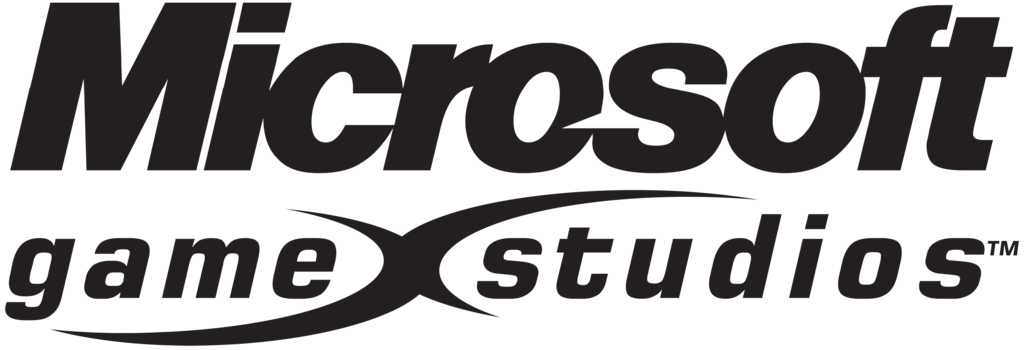
</div>

## Microsoft Gaming

[Microsoft Gaming](https://en.wikipedia.org/wiki/Microsoft_Gaming) (also knows as Microsoft Game Studios) is a multinational division of [Microsoft](https://en.wikipedia.org/wiki/Microsoft) based out of Redmond, Washington. Microsoft Gaming itself is made up of other developers and publishers including but not limited to : [Xbox Game Studios](https://en.wikipedia.org/wiki/Xbox_Game_Studios), [Bethesda Softworks (publisher of ZeniMax Media)](https://en.wikipedia.org/wiki/Bethesda_Softworks), [Activision Blizzard](https://en.wikipedia.org/wiki/Activision_Blizzard), and [King (the latter three are publishers of Activision Blizzard)](https://en.wikipedia.org/wiki/King_(company)). Before Microsoft made the acquisitions mentioned above, their gaming division was known as [Microsoft Game Studios](https://en.wikipedia.org/wiki/Xbox_Game_Studios) (MGS). The name of the division was changed in 2022 to envelop the newly purchased studios under one umbrella. Upon the finalizing of the purchase of [Activison Blizzard](https://en.wikipedia.org/wiki/Activision_Blizzard), which itself includes many smaller studios such as [Treyarch](https://en.wikipedia.org/wiki/Treyarch) and [Infinity Ward](https://en.wikipedia.org/wiki/Infinity_Ward), Microsft Gaming became one of the worlds largest gaming companies, only rivaled by companies such as Sony, Nintendo and Tencent. Microsft is known for several AAA games such as the [Halo series](https://en.wikipedia.org/wiki/Halo_(franchise)), [Flight Simulator](https://en.wikipedia.org/wiki/Microsoft_Flight_Simulator) and [Gears of War](https://en.wikipedia.org/wiki/Gears_of_War). Now that Microsft Gaming has largely expanded its reach with the acquisitons mentions above, they now are associated with some of the biggest games in the world, such as [Call of Duty](https://en.wikipedia.org/wiki/Call_of_Duty), the [Warcraft series](https://en.wikipedia.org/wiki/Warcraft), [Minecraft](https://en.wikipedia.org/wiki/Minecraft) and [Candy Crush Saga](https://en.wikipedia.org/wiki/Candy_Crush_Saga). The addition of these extremely profitable and popular games (on top of Microsoft already making gaming consoles and computers) no doubt adds much interest into the stock associated with this company. 

Let's look into how Microsft Gaming has evolved over the years regarding stock info and the related first party releases and projects they have released to the public.

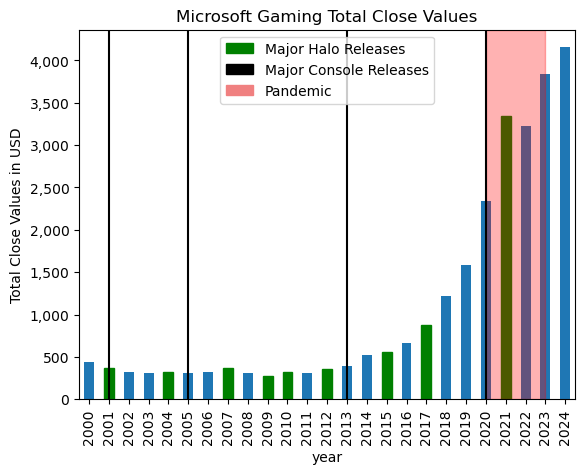

In [18]:
fig, ax = plt.subplots()

# create a dataframe with only the needed company and columns
micro = df[df['Company'] == 'Microsoft Gaming'].copy()
micro_sort = micro.groupby('year')['Close'].sum()
ax = micro_sort.plot(kind = 'bar')

# halo release dates
ax.patches[1].set_color('g')
ax.patches[4].set_color('g')
ax.patches[7].set_color('g')
ax.patches[9].set_color('g')
ax.patches[10].set_color('g')
ax.patches[12].set_color('g')
ax.patches[15].set_color('g')
ax.patches[17].set_color('g')
ax.patches[21].set_color('g')

# console release dates
ax.axvline([1], color = 'k')
ax.axvline([5], color = 'k')
ax.axvline([13], color = 'k')
ax.axvline([20], color = 'k')

# pandemic
plt.axvspan(20, 23, color = 'r', alpha = 0.3)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

# legend creation
halo_release = mpatches.Patch(color = 'g', label = 'Major Halo Releases')
console_release = mpatches.Patch(color = 'k', label = 'Major Console Releases')
pandemic = mpatches.Patch(color = 'lightcoral', label = 'Pandemic')

# labels
ax.set_title('Microsoft Gaming Total Close Values')
ax.set_ylabel('Total Close Values in USD')

# output
plt.legend(handles = [halo_release, console_release, pandemic])
plt.show();

Here we can see the total close values per year. From 2000 to 2015 we can see minimal growth, even in the years where a Halo game was released or when a new console generation is started. However, this pattern breaks in 2020, with a large increase of closing stock values for that year. This can clearly be attributed to the pandemic, where a large portion of the world was quarantined, resulting in a spike in home intertainment with gaming receiving a huge boost in popularity. This resulted in the close values for Microsoft Gaming rising by 47% from 2019 to 2020.

In [19]:
get_year_val(2019, 2020, 'Microsoft Gaming', 'Close')

'for Microsoft Gaming, the year of 2019 had the Close value of 1588.25, 2020 had the Close value of 2335.75, resulting in a 47.06% gain'

During the pandemic, from the years 2020 to 2023, Microsoft Gaming had an increase of 64% in closing stock values. This is a major increase in such a short amount of time, especially when compared to the failry small incremental close value increases from 2000 to 2013, with a noticable increase from 2014 to 2019 before the major spike.

In [20]:
get_year_val(2020, 2023, 'Microsoft Gaming', 'Close')

'for Microsoft Gaming, the year of 2020 had the Close value of 2335.75, 2023 had the Close value of 3834.21, resulting in a 64.15% gain'

In [21]:
get_year_avg(2020, 2023, 'Microsoft Gaming', 'Close')

'From the years of 2020 to 2023, Microsoft Gaming close values has had an average of 3184.14 per year'

In [22]:
get_year_val(2000, 2013, 'Microsoft Gaming', 'Close')

'for Microsoft Gaming, the year of 2000 had the Close value of 437.69, 2013 had the Close value of 395.87, resulting in a -9.55% loss'

In [23]:
get_year_avg(2000, 2013, 'Microsoft Gaming', 'Close')

'From the years of 2000 to 2013, Microsoft Gaming close values has had an average of 338.67 per year'

In [24]:
micro.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,year,Open Value in USD,High Value in USD,Low Value in USD,Close Value in USD,Adj Close in USD
542,2000-01-01,Microsoft Gaming,MSFT,USD,58.68750,59.3125,47.43750,48.93750,30.174570,1274875200,2000,58.6875,59.3125,47.4375,48.9375,30.17457
543,2000-02-01,Microsoft Gaming,MSFT,USD,49.25000,55.0000,44.06250,44.68750,27.554047,1334487600,2000,49.25,55.0,44.0625,44.6875,27.554047
544,2000-03-01,Microsoft Gaming,MSFT,USD,44.81250,57.5000,44.46875,53.12500,32.756535,2028187600,2000,44.8125,57.5,44.46875,53.125,32.756535
545,2000-04-01,Microsoft Gaming,MSFT,USD,47.21875,48.2500,32.50000,34.87500,21.503712,2258146600,2000,47.21875,48.25,32.5,34.875,21.503712
546,2000-05-01,Microsoft Gaming,MSFT,USD,36.43750,37.0000,30.18750,31.28125,19.287834,1344430800,2000,36.4375,37.0,30.1875,31.28125,19.287834


---
## Electronic Arts

<div>
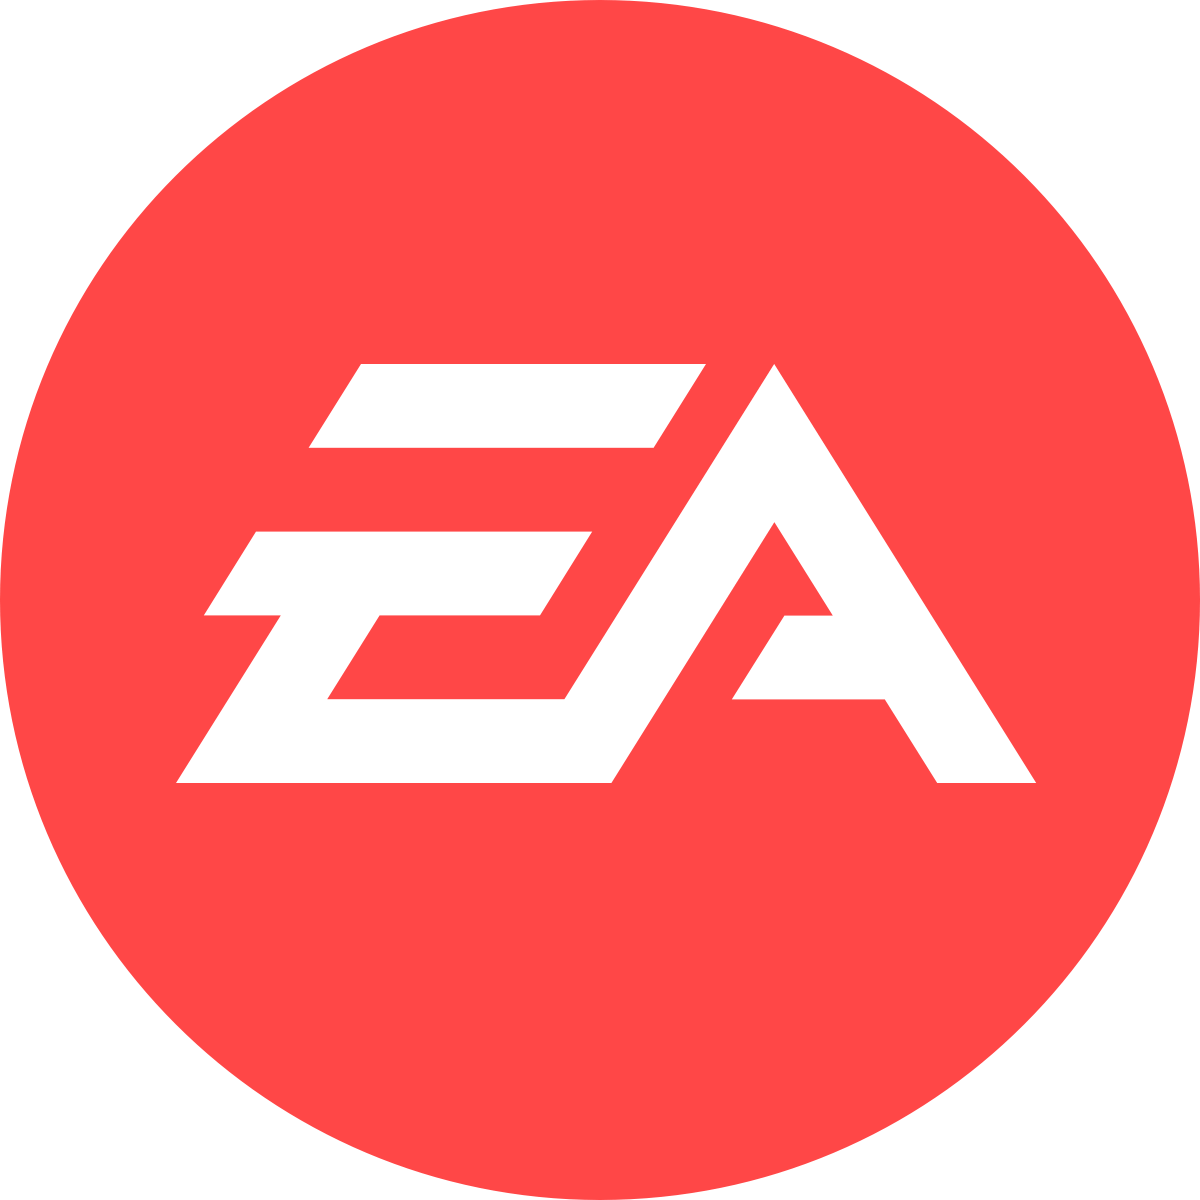
</div>

[Electronic Arts](https://en.wikipedia.org/wiki/Electronic_Arts) (EA) is headquarted in Redwood City, California. EA ownes several major gaming studios including :  [Respawn Entertainment](https://en.wikipedia.org/wiki/Respawn_Entertainment), [BioWare](https://en.wikipedia.org/wiki/BioWare), [Motive Studio](https://en.wikipedia.org/wiki/Motive_Studio) and [Dice](https://en.wikipedia.org/wiki/DICE_(company)). These studios along with EA are responsable for several major game titles such as [Battlefield](https://en.wikipedia.org/wiki/Battlefield_(video_game_series)), the [Dragon Age](https://en.wikipedia.org/wiki/Dragon_Age) series, as well as severel [Star Wars](https://en.wikipedia.org/wiki/List_of_Star_Wars_video_games) games. Most notibly though, are the series of sports games under the [EA Sports](https://en.wikipedia.org/wiki/EA_Sports) umbrella. Games such as [FIFA](https://en.wikipedia.org/wiki/FIFA_(video_game_series)) and [Madden NFL](https://en.wikipedia.org/wiki/Madden_NFL). EA is also a major competator when it comes to the [battle royale](https://en.wikipedia.org/wiki/Battle_royale_game) market, a game ganre that is generally defined by a survival based gameplay loop, where other online players are placed on a map and forced into combat with each other, and the last one standing wins. Ea's version is called [Apex Legends](https://en.wikipedia.org/wiki/Apex_Legends). Other popular titles include the mega successfull [Fortnite Battle Royale](https://en.wikipedia.org/wiki/Fortnite_Battle_Royale), [Call of Duty : Warzone](https://en.wikipedia.org/wiki/Call_of_Duty:_Warzone) and [PlayerUnknown's Battlegrounds (PUBG)](https://en.wikipedia.org/wiki/PUBG:_Battlegrounds).

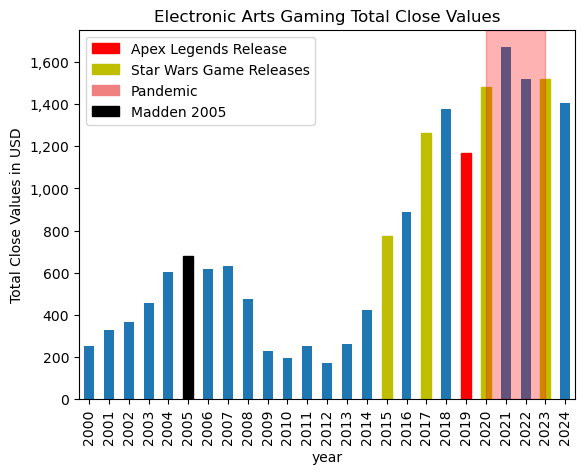

In [25]:
fig, ax = plt.subplots()

# create a dataframe with only the needed company and columns
ea = df[df['Company'] == 'Electronic Arts'].copy()
ea_sort = ea.groupby('year')['Close'].sum()
ax = ea_sort.plot(kind = 'bar')

# EA games release dates
ax.patches[5].set_color('k')
ax.patches[15].set_color('y')
ax.patches[17].set_color('y')
ax.patches[19].set_color('r')
ax.patches[20].set_color('y')
ax.patches[23].set_color('y')

# pandemic
plt.axvspan(20, 23, color = 'r', alpha = 0.3)

# format the x axis to have commas
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

# legend creation
apex_release = mpatches.Patch(color = 'r', label = 'Apex Legends Release')
starwars_release = mpatches.Patch(color = 'y', label = 'Star Wars Game Releases')
pandemic = mpatches.Patch(color = 'lightcoral', label = 'Pandemic')
madden = mpatches.Patch(color = 'k', label = "Madden 2005")

# labels
ax.set_title('Electronic Arts Gaming Total Close Values')
ax.set_ylabel('Total Close Values in USD')

# output
plt.legend(handles = [apex_release, starwars_release, pandemic, madden])
plt.show();

Here we can see some major releases for EA. EA takes part in a release technique involving yearly releases of specific titles. These titles include Madden NFL, FIFA and EA Sports College football. This strategy utilizes the fact that rosters for sports teams are contantly changing, allowing for EA to release a similar game to the previous year, just with updated players. This is generally frowned upon in the gaming community, however EA's sports games are constantly among the top sellers every year. Madden 2005 is regarded as one of the best maddens ever made. Some even saying the best sports game in general. This is backed by a very successfull year for EA in 2005. Even though they had other projects and releases that year, Madden 2005 no doubt had a role in the companies success. Like Microsift Gaming, the pandemic saw huge benifit to the company, however EA had a much better lead up to the pandemic, growing very fast before it had even started. This can be attributed to the 2 major Star Wars releases, as well as the explosive success of Apex Legends, which shadow dropped (releases without an announcement) on its release date. 

In [26]:
get_year_val(2014, 2015, 'Electronic Arts', 'Close')

'for Electronic Arts, the year of 2014 had the Close value of 422.27, 2015 had the Close value of 772.24, resulting in a 82.88% gain'

Above we can see the jump from 2014 to 2015 that seems to have kickstarted a consistant rise of stocke values over the next few years. Let's see how they faired during the pandemic.

In [27]:
get_year_val(2020, 2023, 'Electronic Arts', 'Close')

'for Electronic Arts, the year of 2020 had the Close value of 1481.33, 2023 had the Close value of 1520.39, resulting in a 2.64% gain'

Here we can see that even though EA had a spike in close values in 2021, the overall change throughout the pandemic was very small, only about 2.6%.

In [28]:
get_year_val(2000, 2005, 'Electronic Arts', 'Close')

'for Electronic Arts, the year of 2000 had the Close value of 250.5, 2005 had the Close value of 680.47, resulting in a 171.64% gain'

In [29]:
get_year_val(2006, 2013, 'Electronic Arts', 'Close')

'for Electronic Arts, the year of 2006 had the Close value of 616.3, 2013 had the Close value of 264.22, resulting in a -57.13% loss'

Here we can see the growth EA experianced from 2000 to 2005, followed by a period of loss from 2006 to 2013, with a loss of 57% in closing stock values. 

## Sony Interactive Entertainment

<div>
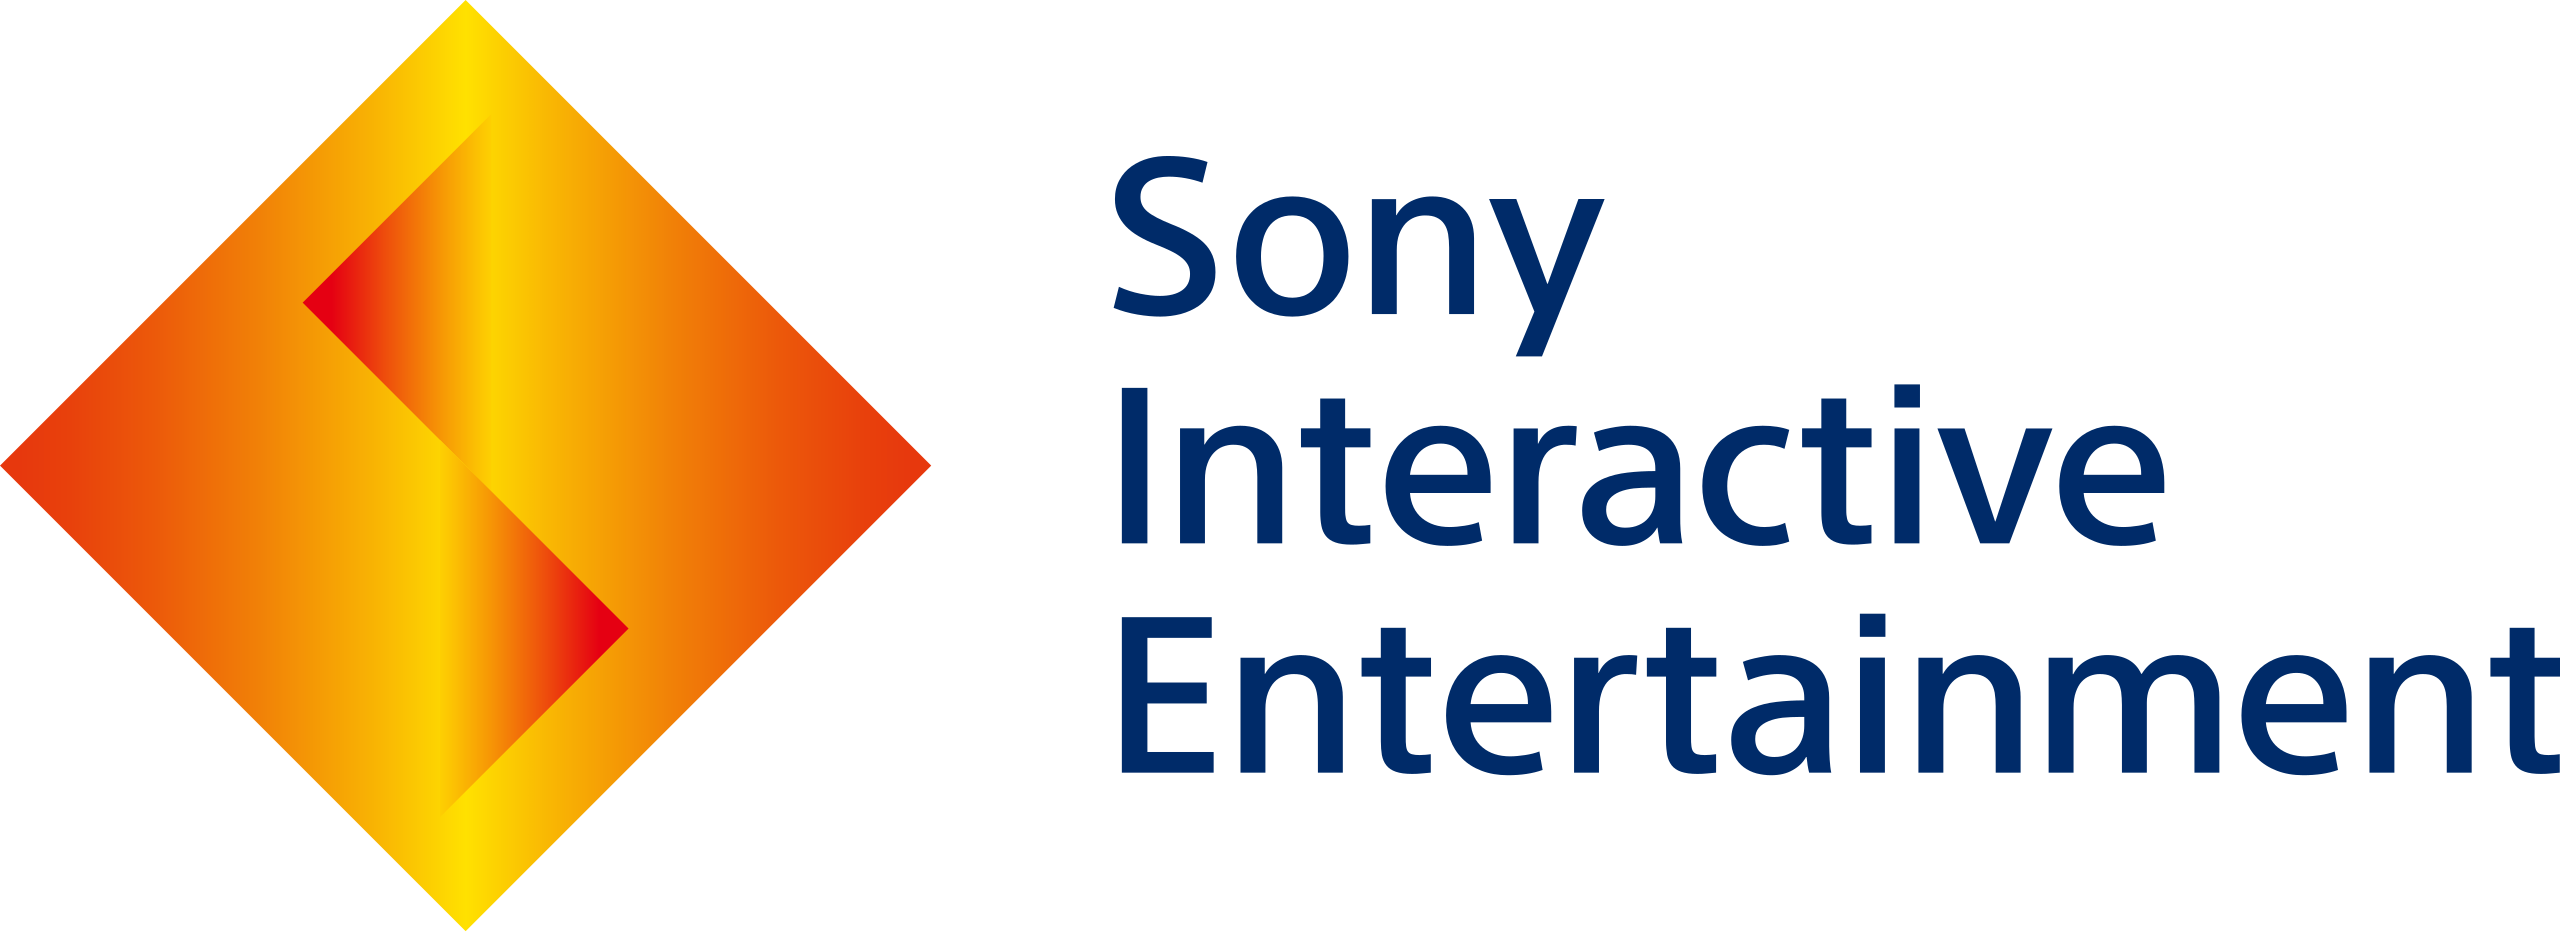
</div>

[Sony Interactive Entertainment](https://en.wikipedia.org/wiki/Sony_Interactive_Entertainment) is a subsidiary of Sony Group Corporation, primarily operating trough its video game and console sales. Popular first party games include : [God of War](https://en.wikipedia.org/wiki/God_of_War_(2018_video_game)), [Horizon Zero Dawn](https://en.wikipedia.org/wiki/Horizon_Zero_Dawn) and [Spider-Man](https://en.wikipedia.org/wiki/Spider-Man_(2018_video_game)). Sony also produces the very popular playstation consoles, which often sale umong the top console sales, only rivaled by the nintendo switch. 

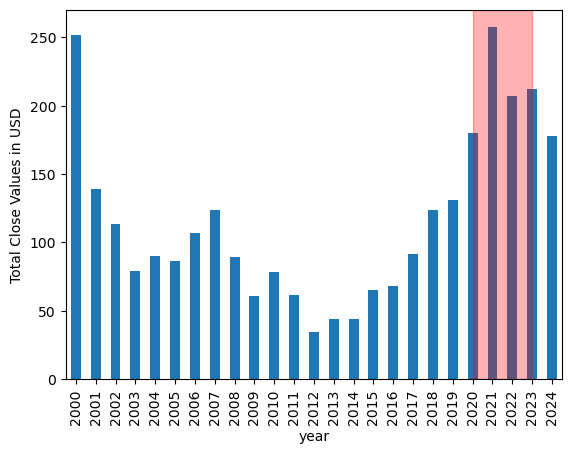

In [46]:
fig, ax = plt.subplots()

# create a dataframe with only the needed company and columns
sony = df[df['Company'] == 'Sony Interactive Entertainment'].copy()
sony_sort = sony.groupby('year')['Close'].sum()
ax = sony_sort.plot(kind = 'bar')

# halo release dates
#ax.patches[1].set_color('g')
#ax.patches[4].set_color('g')
#ax.patches[7].set_color('g')
#ax.patches[9].set_color('g')
#ax.patches[10].set_color('g')
#ax.patches[12].set_color('g')
#ax.patches[15].set_color('g')
#ax.patches[17].set_color('g')
#ax.patches[21].set_color('g')

# console release dates
#ax.axvline([1], color = 'k')
#ax.axvline([5], color = 'k')
#ax.axvline([13], color = 'k')
#ax.axvline([20], color = 'k')

# pandemic
plt.axvspan(20, 23, color = 'r', alpha = 0.3)

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

# legend creation
#halo_release = mpatches.Patch(color = 'g', label = 'Major Halo Releases')
#console_release = mpatches.Patch(color = 'k', label = 'Major Console Releases')
#pandemic = mpatches.Patch(color = 'lightcoral', label = 'Pandemic')

# labels
#ax.set_title('Microsoft Gaming Total Close Values')
ax.set_ylabel('Total Close Values in USD')

# output
#plt.legend(handles = [halo_release, console_release, pandemic])
plt.show();

---
# Exploritory Data Analysis (EDA)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Company'].value_counts()

In [ ]:
df['Currency'].value_counts()

In [ ]:
fig, ax = plt.subplots()
df['Company'].value_counts().plot(kind = 'barh')
ax.set_title('Entries Per Company')
plt.show();

---
## Open Values

In [ ]:
plot_val(df, 'Open')

In [ ]:
plot_val(df, 'Open Value in USD')

In [ ]:
show_pics(r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-21 123607.png", r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-21 123546.png")

---
## High Values

In [ ]:
plot_val(df, 'High')

In [ ]:
plot_val(df, 'High Value in USD')

In [ ]:
show_pics(r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-22 135358.png", r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-22 135408.png")

---
## Low Values

In [ ]:
plot_val(df, 'Low')

In [ ]:
plot_val(df, 'Low Value in USD')

In [ ]:
show_pics(r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-22 135637.png", r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-22 135651.png")

---
## Close Values

In [ ]:
plot_val(df, 'Close')

In [ ]:
plot_val(df, 'Close Value in USD')

In [ ]:
show_pics(r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-30 200502.png",r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-30 200518.png")

---
## Adjusted Close

In [ ]:
plot_val(df, 'Adj Close')

In [ ]:
plot_val(df, 'Adj Close in USD')

In [ ]:
show_pics(r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-30 200650.png",r"C:\Users\darry\Pictures\Screenshots\Screenshot 2025-01-30 200659.png")

---
## Volume

In [ ]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()

df_vol = df.sort_values('year')
ax.bar(df_vol['year'], df_vol['Volume'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
plt.show();

In [ ]:
entries_per_year = df.groupby('year').size()

fig, ax = plt.subplots()

ax.set_title('Entries per Year')
ax.set_ylabel('Entries')
avg = sum(entries_per_year) / len(entries_per_year)
ax.axhline(avg, color = 'r')
entries_per_year.plot(kind = 'bar')
plt.legend(['Average'])
plt.show();

In [ ]:
print(avg)

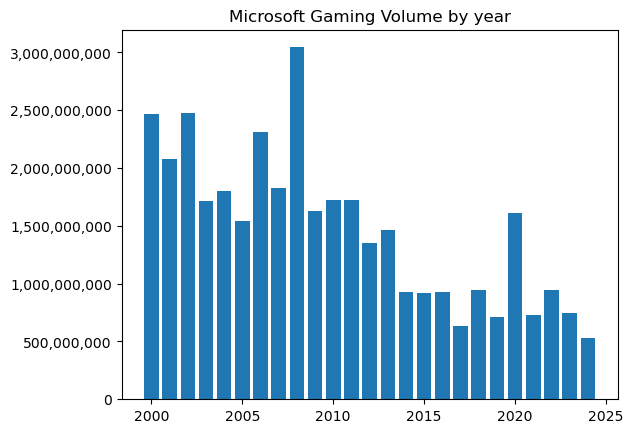

In [37]:
df_micro = df[df['Company'] == 'Microsoft Gaming']

fig, ax = plt.subplots()

x = df_micro['year']
y = df_micro['Volume']
ax.set_title('Microsoft Gaming Volume by year')

ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
ax.bar(x, y)
plt.show();

In [ ]:
df_micro.head()